<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Zomato_price_predictiion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [ ]:
df_final = pd.read_csv("/content/ZOMATO.NS.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [ ]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02,135.750000,140.750000,135.149994,139.699997,139.699997,66909732
2021-08-03,137.000000,140.800003,137.000000,139.399994,139.399994,46610001
2021-08-04,139.800003,141.000000,135.250000,138.399994,138.399994,41134419
2021-08-05,138.750000,138.899994,132.000000,134.949997,134.949997,38437134
2021-08-06,135.500000,136.199997,130.100006,131.350006,131.350006,31975356


In [ ]:
print(df.shape)

(249, 7)


In [ ]:
#gives the details of each columns of the dataset like mean, max etc
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,104.382329,106.504819,101.424900,103.673896,103.673896,4.166226e+07
std,34.860880,35.363715,34.083142,34.769891,34.769891,5.291387e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,4.101820e+06
25%,74.400002,74.849998,71.199997,72.150002,72.150002,1.485174e+07
50%,95.750000,98.000000,93.349998,94.449997,94.449997,2.645290e+07
75%,137.050003,138.949997,133.300003,136.600006,136.600006,4.304954e+07
max,161.149994,169.000000,154.250000,160.300003,160.300003,4.123047e+08


In [ ]:
#checking whether their is any null value in the dataset
# .sum() will give the total no. of null value column vise 
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

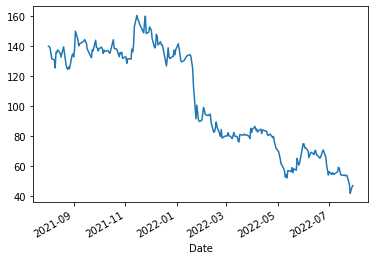

In [ ]:
df_final['Adj Close'].plot()

Correlation Analysis

In [ ]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

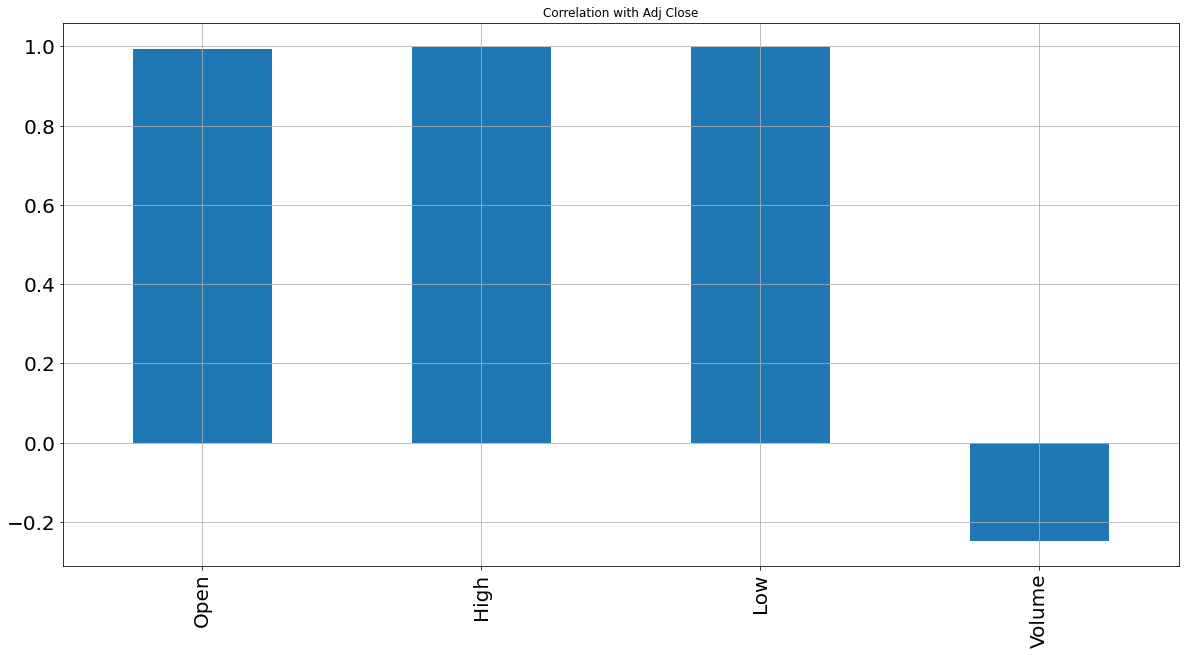

In [ ]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [ ]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02,135.750000,140.750000,135.149994,139.699997,139.699997,66909732
2021-08-03,137.000000,140.800003,137.000000,139.399994,139.399994,46610001
2021-08-04,139.800003,141.000000,135.250000,138.399994,138.399994,41134419
2021-08-05,138.750000,138.899994,132.000000,134.949997,134.949997,38437134
2021-08-06,135.500000,136.199997,130.100006,131.350006,131.350006,31975356


In [ ]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

Normalizing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2021-08-02,0.788861,0.773274,0.831940,0.153864
2021-08-03,0.799252,0.773676,0.848218,0.104135
2021-08-04,0.822527,0.775281,0.832820,0.090721
2021-08-05,0.813799,0.758427,0.804223,0.084113
2021-08-06,0.786783,0.736758,0.787506,0.068284


In [ ]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2021-08-02,0.788861,0.773274,0.831940,0.153864
2021-08-03,0.799252,0.773676,0.848218,0.104135
2021-08-04,0.822527,0.775281,0.832820,0.090721
2021-08-05,0.813799,0.758427,0.804223,0.084113
2021-08-06,0.786783,0.736758,0.787506,0.068284


Shape of features :  (249, 4)
Shape of target :  (249, 1)


,Open,High,Low,Volume
Date,,,,
2022-07-22,0.107232,0.077047,0.108227,0.056835
2022-07-25,0.096841,0.065008,0.047514,0.560357
2022-07-26,0.047797,0.018058,0.005279,1.000000
2022-07-27,0.000000,0.000000,0.000000,0.997306
2022-07-28,0.033666,0.015249,0.021557,0.645372


,Adj Close
Date,
2022-07-22,47.599998
2022-07-25,41.650002
2022-07-26,43.950001
2022-07-27,45.700001
2022-07-28,46.799999



 -----After process------ 

Shape of features :  (159, 4)
Shape of target :  (159, 1)


,Adj Close
Date,
2022-03-15,75.949997
2022-03-16,80.849998
2022-03-17,80.400002
2022-03-21,81.150002
2022-03-22,80.750000


Train test Split using Timeseriessplit

In [ ]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
X_train.shape

(145, 4)

In [ ]:
X_test.shape

(14, 4)

In [ ]:
y_train.shape

(145,)

In [ ]:
y_test.shape

(14,)

In [ ]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()


Benchmark Model

RMSE:  20.41822791587772
R2 score:  -2.078937528677764


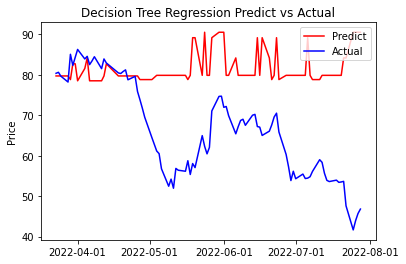

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

Process the data for LSTM

In [ ]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

Model building : LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=1000, batch_size=8, verbose=1, shuffle=False,callbacks=[early_stop])

Epoch 1/1000
19/19 [==============================] - 1s 4ms/step - loss: 17013.3281
Epoch 2/1000
19/19 [==============================] - 0s 4ms/step - loss: 16996.6191
Epoch 3/1000
19/19 [==============================] - 0s 3ms/step - loss: 16981.0117
Epoch 4/1000
19/19 [==============================] - 0s 4ms/step - loss: 16963.5000
Epoch 5/1000
19/19 [==============================] - 0s 3ms/step - loss: 16942.2148
Epoch 6/1000
19/19 [==============================] - 0s 4ms/step - loss: 16916.3008
Epoch 7/1000
19/19 [==============================] - 0s 3ms/step - loss: 16884.9141
Epoch 8/1000
19/19 [==============================] - 0s 5ms/step - loss: 16847.2402
Epoch 9/1000
19/19 [==============================] - 0s 3ms/step - loss: 16802.5000
Epoch 10/1000
19/19 [==============================] - 0s 4ms/step - loss: 16750.0195
Epoch 11/1000
19/19 [==============================] - 0s 4ms/step - loss: 16689.2207
Epoch 12/1000
19/19 [==============================] - 0s 4ms/s

Evaluation of Model

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.933
The R2 score on the Test set is:	-0.207


Predictions made by LSTM

In [ ]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

14/14 [==============================] - 1s 4ms/step - loss: 4.3476


In [ ]:
print('LSTM: %f'%score_lstm)

LSTM: 4.347641


In [ ]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

LSTM's Prediction Visual

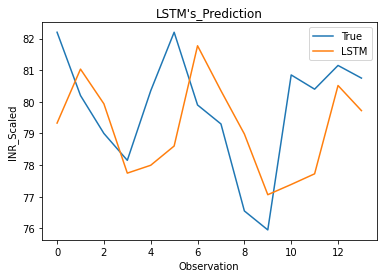

In [ ]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

Converting Prediction data

In [ ]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('PredictionResults_LSTM_NonShift.xlsx')

Conclusion
It is impossible to get a model that can 99% predict the price without any error, there are too many factors can affect the stock prices. So, we cannot hope there is a perfect model, but the general trend of predicted price is in line with the actual data, so the trader could have an indicator to reference, and makes trading decision by himself.

Further, we can improve the model's accuracy by increasing the epochs, trying out different activation functions or even change the model's structure. As exact